## 2D velocity learner

In [2]:
import numpy as np

def read_txt(txt_file):
    
    timestamps, positions, velocities = [], [], []
    
    with open(txt_file) as txt:
        i = 1
        for line in txt:
            line_info = line.split(',')
            timestamps.append(eval(line_info[0].split()[-1]))
#             print(i, eval(line_info[0].split()[-1]))
            i += 1
            if line_info[1].split(':')[1][1:].split()[0] == '[':
                x = eval(line_info[1].split(':')[1][1:].split()[1][1:])
                y = eval(line_info[1].split(':')[1][1:].split()[2])
                if line_info[1].split(':')[1][1:].split()[3].endswith(']'):
                    z = eval(line_info[1].split(':')[1][1:].split()[3][:-1])
                else:
                    z = eval(line_info[1].split(':')[1][1:].split()[3])
            else:
                x = eval(line_info[1].split(':')[1][1:].split()[0][1:])
                y = eval(line_info[1].split(':')[1][1:].split()[1])
                z = eval(line_info[1].split(':')[1][1:].split()[2])
            positions.append((x,y,z))
            vx = eval(line_info[2].split('Vector3(')[1][2:])
            vy = eval(line_info[3][3:])
            wz = eval(line_info[-1][3:-3])
            velocities.append((vx, vy, wz))
            

    return timestamps, positions, velocities
timestamps, positions, velocities = read_txt("../../ros2_dynamics_learner/experiments/dynamics_data_2d.txt")


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

def read_csv(cur_state_file, ref_state_file):
    pass

cur_state_file = "../data/states/current_state.csv"
ref_state_file = "../data/states/reference_state.csv"
cur_states = pd.read_csv(cur_state_file)
cur_states['timestamp'] = cur_states['time'].apply(lambda t: datetime.strptime(t[:-3], "%Y/%m/%d %H:%M:%S.%f"))
cur_states['ref_state'] = np.nan
cur_states[["timestamp", "state_vector", "ref_state"]]

,timestamp,state_vector,ref_state
0,2022-03-09 14:08:47.855500,"[-3.60204024543133, -7.405054168413577, 0.0, -...",NaN
1,2022-03-09 14:08:47.855611,"[-3.603216182470704, -7.403087964321576, 0.0, ...",NaN
2,2022-03-09 14:08:47.868998,"[-3.603259574476164, -7.402355446581472, 0.0, ...",NaN
3,2022-03-09 14:08:47.874180,"[-3.603514971042665, -7.401245208140393, 0.0, ...",NaN
4,2022-03-09 14:08:47.875891,"[-3.6040567922397675, -7.399919985446166, 0.0,...",NaN
...,...,...,...
8967,2022-03-09 14:09:54.653851,"[-4.350783671913201, -6.033497872918735, 0.0, ...",NaN
8968,2022-03-09 14:09:54.661748,"[-4.345255044151483, -6.0364826307590205, 0.0,...",NaN
8969,2022-03-09 14:09:54.664733,"[-4.341159788333822, -6.038692162739134, 0.0, ...",NaN
8970,2022-03-09 14:09:54.676074,"[-4.336695094851229, -6.041101019101331, 0.0, ...",NaN


In [40]:
cur_states

,time,header,state_vector,state_valid,timestamp,ref_state
0,2022/03/09 14:08:47.855500787,"{'stamp': {'secs': 1646834927, 'nsecs': 849520...","[-3.60204024543133, -7.405054168413577, 0.0, -...",0,2022-03-09 14:08:47.855500,NaN
1,2022/03/09 14:08:47.855611999,"{'stamp': {'secs': 1646834927, 'nsecs': 855310...","[-3.603216182470704, -7.403087964321576, 0.0, ...",0,2022-03-09 14:08:47.855611,NaN
2,2022/03/09 14:08:47.868998529,"{'stamp': {'secs': 1646834927, 'nsecs': 868787...","[-3.603259574476164, -7.402355446581472, 0.0, ...",0,2022-03-09 14:08:47.868998,NaN
3,2022/03/09 14:08:47.874180324,"{'stamp': {'secs': 1646834927, 'nsecs': 873983...","[-3.603514971042665, -7.401245208140393, 0.0, ...",0,2022-03-09 14:08:47.874180,NaN
4,2022/03/09 14:08:47.875891551,"{'stamp': {'secs': 1646834927, 'nsecs': 875735...","[-3.6040567922397675, -7.399919985446166, 0.0,...",0,2022-03-09 14:08:47.875891,NaN
...,...,...,...,...,...,...
8967,2022/03/09 14:09:54.653851163,"{'stamp': {'secs': 1646834994, 'nsecs': 653524...","[-4.350783671913201, -6.033497872918735, 0.0, ...",0,2022-03-09 14:09:54.653851,NaN
8968,2022/03/09 14:09:54.661748940,"{'stamp': {'secs': 1646834994, 'nsecs': 661520...","[-4.345255044151483, -6.0364826307590205, 0.0,...",0,2022-03-09 14:09:54.661748,NaN
8969,2022/03/09 14:09:54.664733119,"{'stamp': {'secs': 1646834994, 'nsecs': 664444...","[-4.341159788333822, -6.038692162739134, 0.0, ...",0,2022-03-09 14:09:54.664733,NaN
8970,2022/03/09 14:09:54.676074742,"{'stamp': {'secs': 1646834994, 'nsecs': 675783...","[-4.336695094851229, -6.041101019101331, 0.0, ...",0,2022-03-09 14:09:54.676074,NaN


In [16]:
ref_index = 0
ref_timestamp = ref_states['timestamp'][0]
refs = []
ref_size = len(ref_states)

for cur_index, row in cur_states.iterrows():
    if ref_index + 1>= ref_size:
        refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
    elif row['timestamp'] > ref_states['timestamp'][ref_index+1]:
        ref_index += 1
        refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
    elif row['timestamp'] > ref_states['timestamp'][ref_index]:
        refs.append(ref_states[['vn', 've', 'yaw']].iloc[ref_index].tolist())
    else:
        print(cur_index)
#     print(cur_index, row['timestamp'])
#     break

140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920


5561
5562
5563
5564
5565
5566
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5809
5810
5811
5812
5813
5814
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128


In [18]:
len(refs)

6165

In [3]:
ref_states = pd.read_csv(ref_state_file)
ref_states['timestamp'] = ref_states['time'].apply(lambda t: datetime.strptime(t[:-3], "%Y/%m/%d %H:%M:%S.%f"))
ref_states[["timestamp", "vn", "ve", "yaw"]]

,timestamp,vn,ve,yaw
0,2022-03-09 14:08:45.730987,-0.971014,0.100214,0.0
1,2022-03-09 14:08:47.729780,-0.641888,0.855351,0.0
2,2022-03-09 14:08:49.728785,0.111561,0.127419,0.0
3,2022-03-09 14:08:51.730946,-0.912541,-0.844256,0.0
4,2022-03-09 14:08:53.732966,-0.403013,-0.290656,0.0
5,2022-03-09 14:08:55.738396,0.135273,-0.538782,0.0
6,2022-03-09 14:08:57.731374,-0.761003,0.156645,0.0
7,2022-03-09 14:08:59.734142,-0.116839,-0.369783,0.0
8,2022-03-09 14:09:01.729080,-0.366390,-0.958198,0.0
9,2022-03-09 14:09:03.738195,0.388631,-0.332054,0.0


In [ ]:
for 

In [3]:
# X = (desired velocity, current velocity)
X = np.array(list(zip(velocities[1:], velocities[:-1]))).reshape((-1,6))

# y = (real velocity)
y = np.array(velocities[1:])
X,y

(array([[-0.57835813,  0.        , -0.54016945, -0.57835813,  0.        ,
         -0.54016945],
        [-0.57835813,  0.        , -0.54016945, -0.57835813,  0.        ,
         -0.54016945],
        [-0.57835813,  0.        , -0.54016945, -0.57835813,  0.        ,
         -0.54016945],
        ...,
        [ 0.36580927,  0.        , -0.28686304,  0.36580927,  0.        ,
         -0.28686304],
        [ 0.36580927,  0.        , -0.28686304,  0.36580927,  0.        ,
         -0.28686304],
        [ 0.36580927,  0.        , -0.28686304,  0.36580927,  0.        ,
         -0.28686304]]),
 array([[-0.57835813,  0.        , -0.54016945],
        [-0.57835813,  0.        , -0.54016945],
        [-0.57835813,  0.        , -0.54016945],
        ...,
        [ 0.36580927,  0.        , -0.28686304],
        [ 0.36580927,  0.        , -0.28686304],
        [ 0.36580927,  0.        , -0.28686304]]))

In [4]:
def train_val_test_split(X, y, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1, random_seed=54):
    size = len(X)
    train_num = int(size*train_ratio)
    val_num = int(size*val_ratio)
    
    # randomly shuffling X and y in unison
    np.random.seed(random_seed)
    perm = np.random.permutation(len(X))
    X = X[perm]
    y = y[perm]
    
    X_train, X_val, X_test = X[:train_num], X[train_num:train_num+val_num], X[train_num+val_num:]
    y_train, y_val, y_test = y[:train_num], y[train_num:train_num+val_num], y[train_num+val_num:]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_, X_val_, X_test_, y_train_, y_val_, y_test_ = train_val_test_split(X, y)

In [5]:
X_train_.shape

(4853, 6)

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=20)
rf_regressor.fit(X_train_, y_train_)

RandomForestRegressor(max_depth=20)

In [8]:
from sklearn.metrics import mean_squared_error

rf_predictions = rf_regressor.predict(X_val_)

mean_squared_error(rf_predictions, y_val_)

9.500056619241524e-06

In [9]:
list(zip(y_val_, rf_predictions.tolist()))

[(array([0.08741491, 0.        , 0.04499408]),
  [0.08741490552708159, 0.0, 0.04499408110791908]),
 (array([ 0.40019734,  0.        , -0.21172483]),
  [0.4001973375001199, 0.0, -0.2117248275322236]),
 (array([-0.9561942 ,  0.        ,  0.54571067]),
  [-0.9561942034121141, 0.0, 0.5457106720115041]),
 (array([0.55869468, 0.        , 0.71729988]),
  [0.5586946810703752, 0.0, 0.7172998777272835]),
 (array([0.2227065 , 0.        , 0.36550919]),
  [0.2227065036841048, 0.0, 0.3655091866571991]),
 (array([ 0.54646618,  0.        , -0.00755907]),
  [0.5464661760106183, 0.0, -0.0075590721683620465]),
 (array([-0.67999216,  0.        , -0.94188297]),
  [-0.6799921631920607, 0.0, -0.9418829746605252]),
 (array([-0.7552424 ,  0.        , -0.10325283]),
  [-0.7552424009420398, 0.0, -0.10325283011370104]),
 (array([-0.87053128,  0.        , -0.17970103]),
  [-0.8705312843944262, 0.0, -0.17970102865881946]),
 (array([ 0.70502025,  0.        , -0.37276194]),
  [0.7050202537527228, 0.0, -0.372761936538

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class VelocityPredictor2D(nn.Module):
    
    def __init__(self, n_feature, n_hidden=64, n_output=1, n_layer=1):
        super(VelocityPredictor2D, self).__init__()
        self.input = nn.Linear(n_feature, n_hidden)
        self.fcs = []
        for i in range(n_layer):
            self.fcs.append(nn.Linear(n_hidden, n_hidden))
        self.fcs = nn.ModuleList(self.fcs)
        self.predict = nn.Linear(n_hidden, n_output)
    
    def forward(self, X):
        res = F.relu(self.input(X))
        for fc in self.fcs:
            res = F.relu(fc(res))
        res = self.predict(res)
        return res
    
nn_regressor = VelocityPredictor2D(n_feature=6, n_layer=5, n_output=3)
optimizer = torch.optim.Adam(nn_regressor.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
loss_func = torch.nn.MSELoss()
epochs = 1000

train_perm, val_perm = torch.randperm(len(X_train_)), torch.randperm(len(X_val_)) 

X_train = torch.tensor(X_train_,dtype=torch.float32)[train_perm]
y_train = torch.tensor(y_train_, dtype=torch.float32)[train_perm]
X_val = torch.tensor(X_val_, dtype=torch.float32)[val_perm]
y_val = torch.tensor(y_val_,dtype=torch.float32)[val_perm]

model_save_path = 'nn_4layer_3D_dynamics.pt'
losses = []

for epoch in range(epochs):
    
    best_val_loss = float('inf')
    
    prediction = nn_regressor(X_train)
    loss = loss_func(prediction, y_train)

    optimizer.zero_grad()
    loss.backward()         
    optimizer.step()
#     scheduler.step()
    print(f'epoch number: {epoch+1}, MSE Loss: {loss.data}')
    
    if epoch % 100 == 0:
        val_y_preds = nn_regressor(X_val)
        val_loss = loss_func(val_y_preds, y_val)
        print('Validation Loss: ', val_loss.data)
        losses.append(val_loss.data.item())
        if val_loss.data < best_val_loss:
            best_val_loss = val_loss.data
            torch.save(nn_regressor.state_dict(), model_save_path)

epoch number: 1, MSE Loss: 0.26187342405319214
Validation Loss:  tensor(0.2640)
epoch number: 2, MSE Loss: 0.2615777254104614
epoch number: 3, MSE Loss: 0.26128536462783813
epoch number: 4, MSE Loss: 0.2609945237636566
epoch number: 5, MSE Loss: 0.2607057988643646
epoch number: 6, MSE Loss: 0.26042047142982483
epoch number: 7, MSE Loss: 0.2601375877857208
epoch number: 8, MSE Loss: 0.2598576545715332
epoch number: 9, MSE Loss: 0.25958144664764404
epoch number: 10, MSE Loss: 0.2593093514442444
epoch number: 11, MSE Loss: 0.25904202461242676
epoch number: 12, MSE Loss: 0.25877848267555237
epoch number: 13, MSE Loss: 0.25851818919181824
epoch number: 14, MSE Loss: 0.2582601010799408
epoch number: 15, MSE Loss: 0.25800400972366333
epoch number: 16, MSE Loss: 0.25774937868118286
epoch number: 17, MSE Loss: 0.25750046968460083
epoch number: 18, MSE Loss: 0.25726160407066345
epoch number: 19, MSE Loss: 0.2570260167121887
epoch number: 20, MSE Loss: 0.2567918598651886
epoch number: 21, MSE Los

epoch number: 173, MSE Loss: 0.10077303647994995
epoch number: 174, MSE Loss: 0.09813180565834045
epoch number: 175, MSE Loss: 0.09547629952430725
epoch number: 176, MSE Loss: 0.09281082451343536
epoch number: 177, MSE Loss: 0.09014011174440384
epoch number: 178, MSE Loss: 0.08747072517871857
epoch number: 179, MSE Loss: 0.08481025695800781
epoch number: 180, MSE Loss: 0.08216307312250137
epoch number: 181, MSE Loss: 0.07953564077615738
epoch number: 182, MSE Loss: 0.07692994177341461
epoch number: 183, MSE Loss: 0.07434739917516708
epoch number: 184, MSE Loss: 0.07179057598114014
epoch number: 185, MSE Loss: 0.06926394253969193
epoch number: 186, MSE Loss: 0.0667712613940239
epoch number: 187, MSE Loss: 0.06431382149457932
epoch number: 188, MSE Loss: 0.06189781799912453
epoch number: 189, MSE Loss: 0.05952221527695656
epoch number: 190, MSE Loss: 0.0571904182434082
epoch number: 191, MSE Loss: 0.054906535893678665
epoch number: 192, MSE Loss: 0.0526704415678978
epoch number: 193, MSE

epoch number: 338, MSE Loss: 0.0012034090468659997
epoch number: 339, MSE Loss: 0.001193883828818798
epoch number: 340, MSE Loss: 0.0011844902765005827
epoch number: 341, MSE Loss: 0.0011751465499401093
epoch number: 342, MSE Loss: 0.0011658492730930448
epoch number: 343, MSE Loss: 0.0011566118337213993
epoch number: 344, MSE Loss: 0.0011474727652966976
epoch number: 345, MSE Loss: 0.0011384112294763327
epoch number: 346, MSE Loss: 0.0011294054565951228
epoch number: 347, MSE Loss: 0.0011205197079107165
epoch number: 348, MSE Loss: 0.0011117461835965514
epoch number: 349, MSE Loss: 0.0011030376190319657
epoch number: 350, MSE Loss: 0.0010944174136966467
epoch number: 351, MSE Loss: 0.001085916068404913
epoch number: 352, MSE Loss: 0.001077476772479713
epoch number: 353, MSE Loss: 0.0010691119823604822
epoch number: 354, MSE Loss: 0.0010608520824462175
epoch number: 355, MSE Loss: 0.0010526967234909534
epoch number: 356, MSE Loss: 0.0010446428786963224
epoch number: 357, MSE Loss: 0.001

epoch number: 499, MSE Loss: 0.00046439305879175663
epoch number: 500, MSE Loss: 0.0004620749969035387
epoch number: 501, MSE Loss: 0.0004597768420353532
Validation Loss:  tensor(0.0003)
epoch number: 502, MSE Loss: 0.00045747365220449865
epoch number: 503, MSE Loss: 0.0004551835299935192
epoch number: 504, MSE Loss: 0.00045290892012417316
epoch number: 505, MSE Loss: 0.00045063073048368096
epoch number: 506, MSE Loss: 0.00044835617882199585
epoch number: 507, MSE Loss: 0.0004460980708245188
epoch number: 508, MSE Loss: 0.00044384750071913004
epoch number: 509, MSE Loss: 0.0004416061856318265
epoch number: 510, MSE Loss: 0.0004393886774778366
epoch number: 511, MSE Loss: 0.0004371747490949929
epoch number: 512, MSE Loss: 0.0004349654191173613
epoch number: 513, MSE Loss: 0.0004327749484218657
epoch number: 514, MSE Loss: 0.00043060985626652837
epoch number: 515, MSE Loss: 0.0004284474707674235
epoch number: 516, MSE Loss: 0.0004262967559043318
epoch number: 517, MSE Loss: 0.00042416423

epoch number: 662, MSE Loss: 0.00022236355289351195
epoch number: 663, MSE Loss: 0.00022142966918181628
epoch number: 664, MSE Loss: 0.00022048990649636835
epoch number: 665, MSE Loss: 0.00021958418074063957
epoch number: 666, MSE Loss: 0.0002186560450354591
epoch number: 667, MSE Loss: 0.00021771795582026243
epoch number: 668, MSE Loss: 0.00021681486396118999
epoch number: 669, MSE Loss: 0.00021590717369690537
epoch number: 670, MSE Loss: 0.00021499738795682788
epoch number: 671, MSE Loss: 0.00021409016335383058
epoch number: 672, MSE Loss: 0.00021318985091056675
epoch number: 673, MSE Loss: 0.00021228761761449277
epoch number: 674, MSE Loss: 0.0002113963128067553
epoch number: 675, MSE Loss: 0.000210511963814497
epoch number: 676, MSE Loss: 0.0002096229582093656
epoch number: 677, MSE Loss: 0.00020873776520602405
epoch number: 678, MSE Loss: 0.00020786690583918244
epoch number: 679, MSE Loss: 0.0002070097834803164
epoch number: 680, MSE Loss: 0.00020615213725250214
epoch number: 681,

epoch number: 822, MSE Loss: 0.00011837261990876868
epoch number: 823, MSE Loss: 0.00011786860704887658
epoch number: 824, MSE Loss: 0.00011736810847651213
epoch number: 825, MSE Loss: 0.00011686490324791521
epoch number: 826, MSE Loss: 0.00011636046838248149
epoch number: 827, MSE Loss: 0.00011586114851525053
epoch number: 828, MSE Loss: 0.00011536023521330208
epoch number: 829, MSE Loss: 0.00011486005678307265
epoch number: 830, MSE Loss: 0.00011436364002292976
epoch number: 831, MSE Loss: 0.00011385967809474096
epoch number: 832, MSE Loss: 0.00011335039744153619
epoch number: 833, MSE Loss: 0.00011283851199550554
epoch number: 834, MSE Loss: 0.0001123211914091371
epoch number: 835, MSE Loss: 0.00011180397996213287
epoch number: 836, MSE Loss: 0.00011129021004308015
epoch number: 837, MSE Loss: 0.00011077705858042464
epoch number: 838, MSE Loss: 0.00011026446736650541
epoch number: 839, MSE Loss: 0.00010975159239023924
epoch number: 840, MSE Loss: 0.00010923640365945175
epoch number:

epoch number: 986, MSE Loss: 5.246691944194026e-05
epoch number: 987, MSE Loss: 5.2226841944502667e-05
epoch number: 988, MSE Loss: 5.199648512643762e-05
epoch number: 989, MSE Loss: 5.176312697585672e-05
epoch number: 990, MSE Loss: 5.1533981604734436e-05
epoch number: 991, MSE Loss: 5.13018858327996e-05
epoch number: 992, MSE Loss: 5.1078168326057494e-05
epoch number: 993, MSE Loss: 5.085261364001781e-05
epoch number: 994, MSE Loss: 5.062401760369539e-05
epoch number: 995, MSE Loss: 5.0401740736560896e-05
epoch number: 996, MSE Loss: 5.018365482101217e-05
epoch number: 997, MSE Loss: 4.996056668460369e-05
epoch number: 998, MSE Loss: 4.974445982952602e-05
epoch number: 999, MSE Loss: 4.952775634592399e-05
epoch number: 1000, MSE Loss: 4.9312933697365224e-05


In [9]:
sum(p.numel() for p in nn_regressor.parameters())

21443

([<matplotlib.axis.XTick at 0x7f0aa3b69b50>,
 <a list of 7 Text xticklabel objects>)

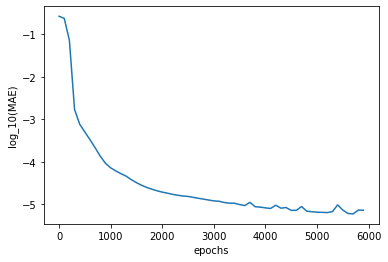

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(len(losses)), np.log10(losses))
plt.xlabel('epochs')
plt.ylabel('log_10(MAE)')
plt.xticks(ticks=np.arange(0,70,10), labels=np.arange(0,7000,1000))

In [16]:
# Load pytorch model

nn_regressor = PositionPredictor3D(n_feature=6, n_layer=5, n_output=3)
nn_regressor.load_state_dict(torch.load('./nn_4layer_3D_dynamics.pt'))
nn_regressor.eval()

PositionPredictor3D(
  (input): Linear(in_features=6, out_features=64, bias=True)
  (fcs): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=64, bias=True)
  )
  (predict): Linear(in_features=64, out_features=3, bias=True)
)

In [17]:
# Validation

val_y_preds = nn_regressor(X_val)
val_loss = loss_func(val_y_preds, y_val)
print(val_loss.data)

tensor(0.2625)
